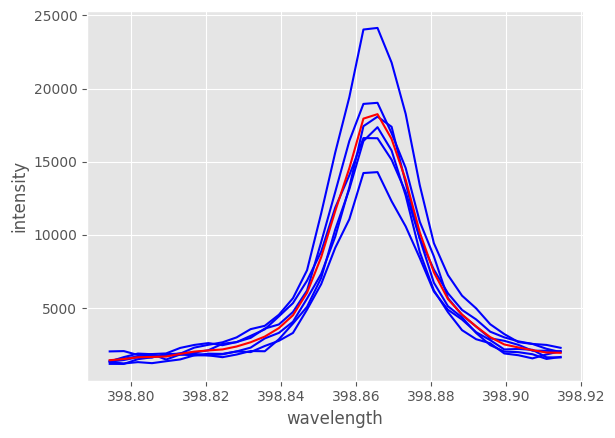

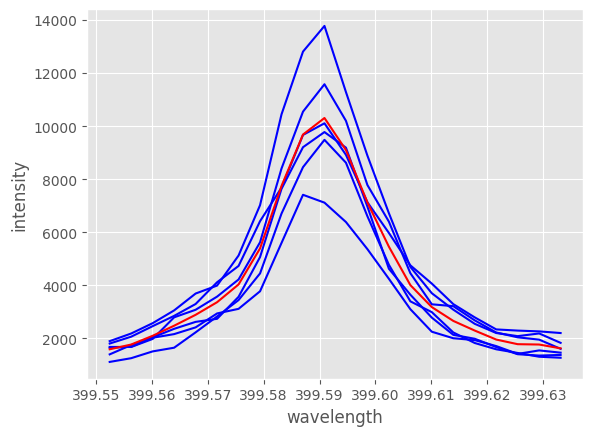

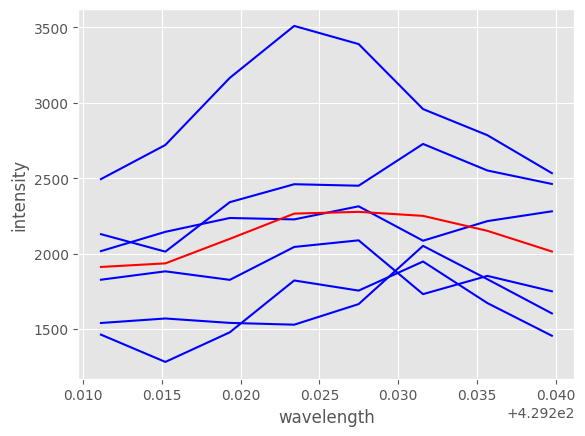

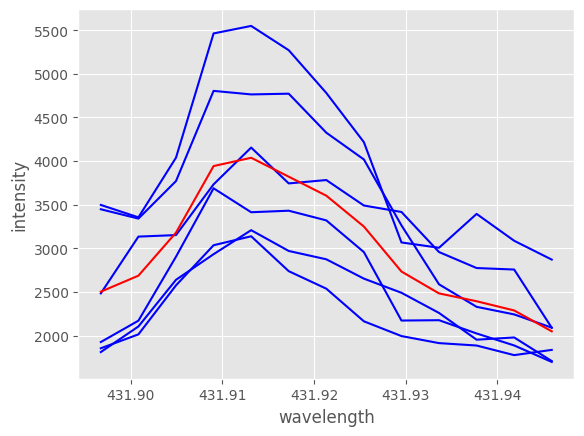

In [57]:
'''
:@Author: Remi
:@Date: 2023/11/15 15:42:40
:@LastEditors: Remi
:@LastEditTime: 2023/11/15 15:42:40
:Description: 
'''
import file_tool as ft
import numpy as np
import preprocessing as pp
import matplotlib.pyplot as plt
'''
保存格式：
eg：csv中

1223  1231  123  2323
123    213  123  23123

代表两个sample对应四个峰的峰面积
'''
################cache/需要改的
conc = []

np.set_printoptions(precision = 6)

peak_list = [429.227494,431.909046,398.86573,399.590886]##############peak position
tol = 1#算峰面积的容差


##################path##########################
filename = r'C:\Users\0\Documents\WeChat Files\wxid_lo02hcn48pud22\FileStorage\File\2023-11\1.csv'#file position
savepath = r'D:\20220419'
##################load#########################

wl,spec=ft.Load_MultiSpec(filename)
meanspec = np.mean(spec,axis = 1)
p,m,peak_list = pp.Peak_integrate(wl,meanspec,peak_list,tol)

##################calculate#####################
for i in range(len(spec[0])):
    for j in range(len(peak_list)):#pm wavelength
        if j == 0:
            slice_ = ((spec[peak_list[j] - m[j]:peak_list[j] + p[j],i]).sum(axis=0))
        else:
            slice_ = np.vstack((slice_,((spec[peak_list[j] - m[j]:peak_list[j] + p[j],i]).sum(axis=0))))

        if i == 0:
            conc.append(wl[peak_list[j]])
    if i == 0:
        slice_sample = slice_   
    else: 
        slice_sample = np.hstack((slice_sample,slice_))
###################save#####################################

np.savetxt(savepath +'\\' + 'square.csv',np.hstack((np.array([conc]).T,slice_sample)).T,delimiter=',',fmt='%.04f')  

###################write##################
for j in range(len(peak_list)):
    with plt.style.context('ggplot'):
        plt.plot(wl[peak_list[j] - m[j]:peak_list[j] + p[j]], spec[:][peak_list[j] - m[j]:peak_list[j] + p[j],:],c = 'b')
        plt.plot(wl[peak_list[j] - m[j]:peak_list[j] + p[j]], meanspec[peak_list[j] - m[j]:peak_list[j] + p[j]],c = 'r')
        plt.xlabel("wavelength")
        plt.ylabel("intensity")
        plt.show()